_The main focus of this assignment is Frequent Patternset Mining from theoretical as well as practical perspective_

## Problem 1: Association Rule Mining

Consider the following dataset

{onion, apple, butter, yogurt, eggs, apple} <br>
{onion, apple, butter, yogurt, eggs, milk} <br>
{eggs, milk, butter, yogurt, eggs, milk} <br>
{cheese, milk, butter, yogurt, eggs, milk} <br>
{cheese, milk, eggs, milk}

- Using the FP-Tree algorithm with min support  = 0.6 and min confidence = 0.75 find all 3-frequent and all 4-frequent items. Show your work.
- List 3 frequent item rulesets that can be derived from the previous set
- Show that any 3-frequent itemsets can be derived from 2-frequent itemsets

### Solution

### Part 1
The first step is to count all of the items in all of the transactions:
* apple: 3
* butter: 4
* cheese: 2
* eggs: 6
* milk: 7
* onion: 2
* yogurt: 4

Note that our minimum support threshold is 60%, which means that each item has to appear at least three times (since we have five transactions, 3/5 = 0.6). Two of our items, cheese and onion, do not pass this threshold, so we won't put them in our FP-Tree.

Next, we need to sort the items according to their support counts. We won't include cheese or onion, since they didn't meet the minimum support threshold.
* milk: 7
* eggs: 6
* butter: 4
* yogurt: 4
* apple: 3

Now, we can start to build our tree. The first transaction is {onion, apple, butter, yogurt, eggs, apple}. Note that the items are added in order of descending support.

<img src="FP-Tree1.png",width=300,height=300>

The next transaction is {onion, apple, butter, yogurt, eggs, milk}.

<img src="FP-Tree2.png",width=350,height=350>

Note that because the first item in the list was milk, which was not in the previous transaction, we had to start a new branch. The next transaction is {eggs, milk, butter, yogurt, eggs, milk}.

<img src="FP-Tree3.png",width=350,height=350>

Note that this transaction was entirely contained within the rightmost branch, so the support counts there were simply updated, and no new branches were formed. The next transaction is {cheese, milk, butter, yogurt, eggs, milk}.

<img src="FP-Tree4.png",width=350,height=350>

Once again, all of the items were contained within the rightmost branch, so the counts were updated again. The last transaction is {cheese, milk, eggs, milk}.

<img src="FP-Tree5.png",width=350,height=350>

Now, with our tree complete, the next step is to form the conditional pattern bases for each item. We start with apples, which are the last item in our sorted list. 

There are two paths that lead to apple: <br>
apple: {eggs, butter, yogurt: 2}, {milk, eggs, butter, yogurt: 1} <br>

We can repeat the process for yogurt, then butter, then eggs, and finally milk. <br>
yogurt: {eggs, butter: 1}, {milk, eggs, butter: 3} <br>
butter: {eggs: 1}, {milk, eggs: 3} <br>
eggs: {milk: 5}

For each of these conditional pattern bases, we can form a conditional FP-Tree by combining the items in a new tree. 

For apple, the pattern bases each start from with a different item, so we can't combine them.

apple: {eggs: 2, butter: 2, yogurt: 2}, {milk: 1, eggs: 1, butter: 1, yogurt: 1}

Neither of these meet the support threshold, so we can't keep either.

For yogurt, the pattern bases also start with a different item, so we can't combine them.

yogurt: {eggs: 1, butter: 1}, {milk: 3, eggs: 3, butter: 3}

We can only keep the latter, since the first does not meet the support threshold.

yogurt: {milk: 3, eggs: 3, butter: 3}

For butter, we also have two paths:

butter: {eggs: 1}, {milk: 3, eggs: 3}

We can only keep the latter, since the first does not meet the support threshold.

butter: {milk: 3, eggs: 3}

Finally, for eggs we have one path:

eggs: {milk: 5}

To summarize, here are our FP-Trees:

yogurt: {milk: 3, eggs: 3, butter: 3} <br>
butter: {milk: 3, eggs: 3} <br>
eggs: {milk: 5}

Finally, from these we can generate all 3-count and 4-count frequent itemsets by recursively combining the items:

{yogurt, milk, eggs, butter: 3} <br>
{yogurt, milk, eggs: 3} <br>
{yogurt, milk, butter: 3} <br>
{yogurt, eggs, butter: 4} <br>
{butter, milk, eggs: 3}

### Part 2
Given the above frequent itemsets, we can develop several rules, ensuring that they meet the confidence threshold of 75% (the support threshold has already been enforced). Note that there are many potential rules, we will only be creating three. An example of a rule is:
* Yogurt, milk, eggs $\rightarrow$ butter

To check this rule, we need to compute the confidence, which is the support count of the all items divided by the support count of the left hand side. For this example, we have confidence equal to 3/3 = 100%.

A second rule is
* Milk $\rightarrow$ eggs, butter
<br> The confidence of this rule is equal to 3/4 = 75%. 

A potential third rule is: eggs $\rightarrow$ yogurt, milk. However, the confidence of this rule is equal to 3/5 = 60%, which is not good enough, so we cannot use it. A better rule is
* Butter $\rightarrow$ yogurt, eggs
<br> The confidence of this rule is equal to 4/4 = 100%.

As stated above, there are many more rules that could be derived, but the above three represent rules that meet the minimum support and confidence.

### Part 3
It is straightforward to show that any 3-frequent itemset can be derived from 2-frequent itemsets. To generate a 3-frequent itemset, you need two 2-frequent itemsets with one item in common. Each of those itemsets is already frequent, meaning it's members meet the minimum support threshold. Taking the union of both itemsets will automatically produce a 3-frequent itemset because all of the individual items are already frequent.

As an example, take the 2-frequent itemsets {butter, yogurt} and {yogurt, milk}. The 3 itemset made from these is {butter, yogurt, milk}, which is indeed one of the 3-frequent itemsets defined in Part 1.

## Problem 2: Applications of FP Mining

Original Problem Statement: Using the NIS Flanders Traffic Accident Dataset apply Frequent Itemset Mining to identify the road conditions, type of roads associated with accidents. Identify other rules of interest that are associated with accidents or lack thereof. Make a case regarding how you can use these rules to reduce traffic accidents.

Updated Problem Statement: Vary the min threshold for support and confidence. Plot the number of rules or item sets generated against support and confidence. Make recommendations regarding the ideal thresholds.

### Solution

As stated, our goal is to see how sensitive the number of rules that are generated is to the minimum support and confidence supplied to the apriori algorithm.

First, we need to load the data set and parse the lines, which as shown below are a series of strings containing comma separated integers.

In [1]:
# Load the Relevant libraries
import sklearn as sk
import urllib
import pandas as pd

# URL for the Traffic Data (UW Repository)
url = "NISTraffic.csv"

# download the file
raw_data = open(url,'r')
lines = raw_data.readlines()
print(len(lines))
print(lines[0:5])

340183
['1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,,,,,,,,,,,,,,,,,,,,\r\n', '2,5,7,8,9,10,12,13,14,15,16,17,18,20,22,23,24,25,27,28,29,32,33,34,35,36,37,38,39,,,,,,,,,,,,,,,,,,,,,,\r\n', '7,10,12,13,14,15,16,17,18,20,25,28,29,30,33,40,41,42,43,44,45,46,47,48,49,50,51,52,,,,,,,,,,,,,,,,,,,,,,,\r\n', '1,5,8,10,12,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,41,43,46,48,49,51,52,53,54,55,56,57,58,59,60,61,,,,,,,,,,,,,\r\n', '5,8,10,12,14,15,16,17,18,21,22,24,25,26,27,28,29,31,33,36,38,39,41,43,46,56,62,63,64,65,66,67,68,,,,,,,,,,,,,,,,,,\r\n']


In [2]:
lines_formatted = []
for i,line in enumerate(lines):
    formatted = []
    line = line.replace(',,','') # Remove blank entries at end of line
    pieces = line.rstrip().split(',')
    if len(pieces) > 0:
        for item in pieces:
            if len(item) > 0:
                formatted.append(int(item))
        lines_formatted.append(formatted)
print(len(lines_formatted))
print(lines_formatted[0:5])

340183
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], [2, 5, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 22, 23, 24, 25, 27, 28, 29, 32, 33, 34, 35, 36, 37, 38, 39], [7, 10, 12, 13, 14, 15, 16, 17, 18, 20, 25, 28, 29, 30, 33, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52], [1, 5, 8, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 41, 43, 46, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], [5, 8, 10, 12, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 29, 31, 33, 36, 38, 39, 41, 43, 46, 56, 62, 63, 64, 65, 66, 67, 68]]


The format above is now usable by the apriori algorithm, as each line is represented by a comma separated list of integers corresponding to specific properties of each traffic accident.

The next step is to run this data through the apriori algorithm, but unfortunately there is not one included in scikit learn. One was found at the following site, and it is reproduced below:

http://adataanalyst.com/machine-learning/apriori-algorithm-python-3-0/

In [3]:
def createC1(dataSet):
    C1 = []
    for transaction in dataSet:
        for item in transaction:
            if not [item] in C1:
                C1.append([item])
                
    C1.sort()
    return list(map(frozenset, C1))#use frozen set so we
                            #can use it as a key in a dict 

In [4]:
def scanD(D, Ck, minSupport):
    ssCnt = {}
    for tid in D:
        for can in Ck:
            if can.issubset(tid):
                if not can in ssCnt: ssCnt[can]=1
                else: ssCnt[can] += 1
    numItems = float(len(D))
    retList = []
    supportData = {}
    for key in ssCnt:
        support = ssCnt[key]/numItems
        if support >= minSupport:
            retList.insert(0,key)
        supportData[key] = support
    return retList, supportData

In [5]:
def aprioriGen(Lk, k): #creates Ck
    retList = []
    lenLk = len(Lk)
    for i in range(lenLk):
        for j in range(i+1, lenLk): 
            L1 = list(Lk[i])[:k-2]; L2 = list(Lk[j])[:k-2]
            L1.sort(); L2.sort()
            if L1==L2: #if first k-2 elements are equal
                retList.append(Lk[i] | Lk[j]) #set union
    return retList

In [6]:
def apriori(dataSet, minSupport = 0.5):
    C1 = createC1(dataSet)
    D = list(map(set, dataSet))
    L1, supportData = scanD(D, C1, minSupport)
    L = [L1]
    k = 2
    while (len(L[k-2]) > 0):
        Ck = aprioriGen(L[k-2], k)
        Lk, supK = scanD(D, Ck, minSupport)#scan DB to get Lk
        supportData.update(supK)
        L.append(Lk)
        k += 1
    return L, supportData

In [7]:
def generateRules(L, supportData, minConf=0.7):  #supportData is a dict coming from scanD
    bigRuleList = []
    for i in range(1, len(L)):#only get the sets with two or more items
        for freqSet in L[i]:
            H1 = [frozenset([item]) for item in freqSet]
            if (i > 1):
                rulesFromConseq(freqSet, H1, supportData, bigRuleList, minConf)
            else:
                calcConf(freqSet, H1, supportData, bigRuleList, minConf)
    return bigRuleList         

In [8]:
def calcConf(freqSet, H, supportData, brl, minConf=0.7):
    prunedH = [] #create new list to return
    for conseq in H:
        try:
            conf = supportData[freqSet]/supportData[freqSet-conseq] #calc confidence
            if conf >= minConf: 
                brl.append((freqSet-conseq, conseq, conf))
                prunedH.append(conseq)
        except:
            pass
    return prunedH

In [9]:
def rulesFromConseq(freqSet, H, supportData, brl, minConf=0.7):
    m = len(H[0])
    if (len(freqSet) > (m + 1)): #try further merging
        Hmp1 = aprioriGen(H, m+1)#create Hm+1 new candidates
        Hmp1 = calcConf(freqSet, Hmp1, supportData, brl, minConf)
        if (len(Hmp1) > 1):    #need at least two sets to merge
            rulesFromConseq(freqSet, Hmp1, supportData, brl, minConf)

Since apriori is known to be slow on large data sets, we'll use a subset to make the problem more tractable.

To measure the sensitivity with regards to the level of support and confidence, both will be iterated from 50%-90% in increments of 10%. For each combination, the number of rules will be computed and stored.

In [10]:
max = int(len(lines_formatted)/40)
print('Max = %i' % max)
support = [item / float(10) for item in range(5,10)]
confidence = support
num_rules = {}
print(support)
for sup in support:
    print('Support = %f' % sup)
    L,suppData = apriori(lines_formatted[0:max],minSupport=sup)
    rlist = []
    for conf in confidence:
        print('  Confidence: %f' % conf)
        rules = generateRules(L,suppData, minConf=conf)
        rlist.append(len(rules))
    num_rules[sup] = rlist

Max = 8504
[0.5, 0.6, 0.7, 0.8, 0.9]
Support = 0.500000
  Confidence: 0.500000
  Confidence: 0.600000
  Confidence: 0.700000
  Confidence: 0.800000
  Confidence: 0.900000
Support = 0.600000
  Confidence: 0.500000
  Confidence: 0.600000
  Confidence: 0.700000
  Confidence: 0.800000
  Confidence: 0.900000
Support = 0.700000
  Confidence: 0.500000
  Confidence: 0.600000
  Confidence: 0.700000
  Confidence: 0.800000
  Confidence: 0.900000
Support = 0.800000
  Confidence: 0.500000
  Confidence: 0.600000
  Confidence: 0.700000
  Confidence: 0.800000
  Confidence: 0.900000
Support = 0.900000
  Confidence: 0.500000
  Confidence: 0.600000
  Confidence: 0.700000
  Confidence: 0.800000
  Confidence: 0.900000


Let's take a look at the number of rules generated for each combination of support and confidence. For each value of support, the rules for the five confidence levels are shown.

In [11]:
for sup in support:
    print('Support = %2.1f' % sup)
    print('  ' + str(num_rules[sup]))

Support = 0.5
  [507403, 444107, 319485, 183365, 63496]
Support = 0.6
  [84297, 84297, 70500, 44253, 17452]
Support = 0.7
  [15040, 15040, 15040, 11523, 4986]
Support = 0.8
  [2322, 2322, 2322, 2322, 1288]
Support = 0.9
  [175, 175, 175, 175, 175]


Let's plot these to get a better look at the trend.

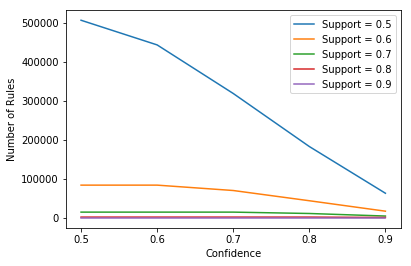

In [12]:
import matplotlib.pyplot as plt
import numpy as np
legend = []
for sup in support:
    rules = num_rules[sup]
    plt.plot(confidence,rules)
    legend.append('Support = %2.1f' % sup)
plt.legend(legend)
plt.xlabel('Confidence')
plt.xticks(confidence)
plt.ylabel('Number of Rules')
plt.show()

From the plot, it's clear that a minimum support level of 50% is too low. A large number of rules are generated (between 60,000 and 500,000), resulting in far too much data to process. Even at 60% minimum support, there are still over 17,000 rules at a confidence level of 90%. Let's remake the plot below, starting at a minimum support level of 70%.

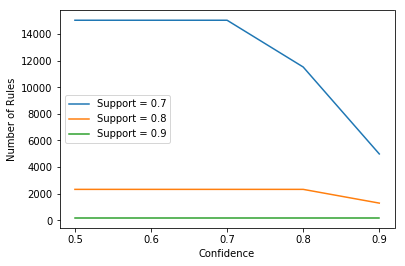

In [13]:
legend = []
for sup in support[2:]:
    rules = num_rules[sup]
    plt.plot(confidence,rules)
    legend.append('Support = %2.1f' % sup)
plt.legend(legend)
plt.xlabel('Confidence')
plt.xticks(confidence)
plt.ylabel('Number of Rules')
plt.show()

This plot definitely looks more reasonable. From these results, I would recommend a minimum support level between 70% and 80%, as 90% looks to be too high with too few rules generated at any level of confidence. For minimum confidence, I would recommend at least 70%, but note that at higher levels of support (>80%), there is not much sensitivity to the confidence level in terms of the number of rules generated.